-------
# **Assignment 1: Clustering Models**
## *Shaikh Mariyam Harunor Rashid - A20MJ4010*
-------

##**Table of Contents**
| No. |  | Content       |
|---------|----|---------------|
| 1.|   | Importing libraries  |
|   |1.1| *Explanation* |
| 2.|   | Dataset - Wine Clustering|
|   |2.1| *Applying Clustering Algorithms*|
|   |2.2| *Calinski-Harabasz Index*|
|   |2.3| *Summary and Conclusion*|
| 3.|   | Dataset - Mall Customer  |
|   |3.1| *Applying Clustering Algorithms*|
|   |3.2| *Calinski-Harabasz Index*|
|   |3.3| *Summary and Conclusion*|

<br>

----
**Link to kaggle datasets:** <br>
[Wine Dataset](https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering)
<br>
[Mall Customer Dataset](https://www.kaggle.com/datasets/sanjayar/simple-shopping-dataset)

----

#1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score

##Explanation

1. pandas: It is essential for data manipulation and analysis. It provides data structures like DataFrames, which are crucial for working with tabular data.

2. numpy: It is a powerful library for numerical operations in Python. It provides support for large, multi-dimensional arrays.

3. matplotlib.pyplot: It is a widely used plotting library in Python. It allows for creating a variety of static, animated, and interactive visualizations.

4. sklearn.preprocessing: StandardScaler is crucial for feature scaling. It standardizes features by removing the mean and scaling to unit variance, ensuring that all features have the same scale.

5. sklearn.cluster: necessary for various clustering algorithms. KMeans uses partitioning clustering algorithm. AgglomerativeClustering is a hierarchical clustering algorithm that builds clusters incrementally. DBSCAN is a density-based clustering algorithm that identifies clusters based on the density of data points. SpectralClustering is a graph-based clustering algorithm using spectral decomposition.
AffinityPropagation is a clustering algorithm that identifies exemplars and forms clusters around them.

6. sklearn.mixture: GaussianMixture is used for Gaussian Mixture Model clustering. It models data as a mixture of multiple Gaussian distributions, making it suitable for complex clustering scenarios.

7. sklearn.metrics: silhouette_score is a metric used to evaluate the performance of clustering algorithms. It quantifies how well-defined the clusters are. The higher the silhouette score, the better-defined the clusters.

#2. Dataset - Wine Clustering

In [ ]:
# Load the dataset
wine_data = pd.read_csv("/content/wine-clustering.csv")

# Display the first few rows of the dataset
print(wine_data.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

The dataset is loaded into a Pandas DataFrame. The dataset is read from a CSV file located at the specified path ("/content/wine-clustering.csv"). The pd.read_csv() function is part of the Pandas library and is used for reading data from CSV files into a DataFrame.

The .head() method is applied to the DataFrame (wine_data) to show the top rows. By default, it displays the first 5 rows, providing a quick overview of the dataset's structure and content.

In [ ]:
selected_features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols',
                     'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity',
                     'Hue', 'OD280', 'Proline']

# Drop rows with missing values
wine_data = wine_data[selected_features].dropna()

# Standardize the data
scaler = StandardScaler()
wine_data_scaled = scaler.fit_transform(wine_data)

This code segment selects a relevant subset of features, including 'Alcohol', 'Malic_Acid', 'Ash', and others, from the wine dataset. Rows with missing values in the chosen features are then removed, and the remaining data is standardized using the StandardScaler. This preprocessing ensures the data is suitable for subsequent clustering algorithms, facilitating an unbiased and meaningful analysis.

## Applying Clustering Algorithms

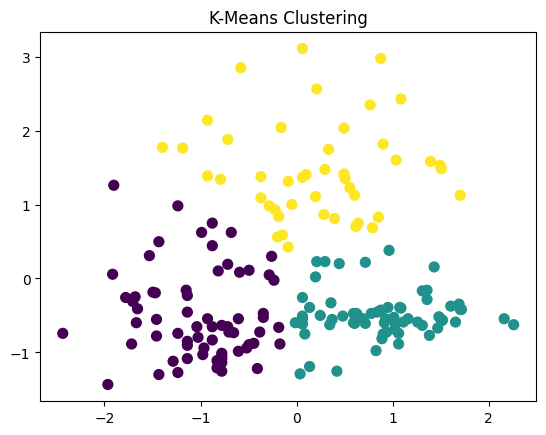

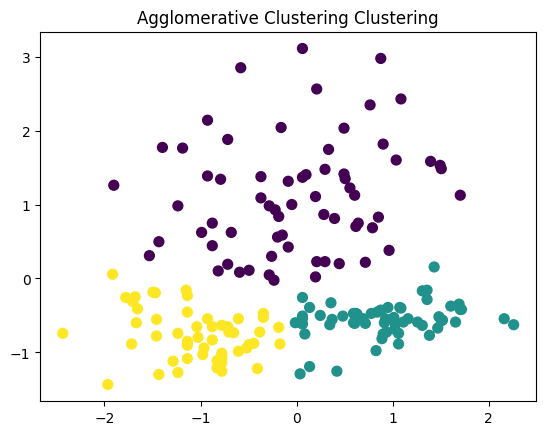

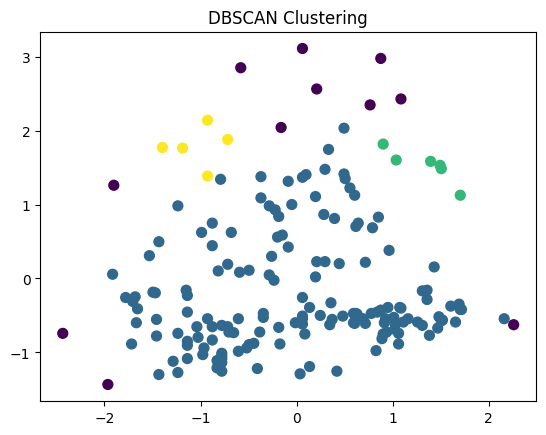

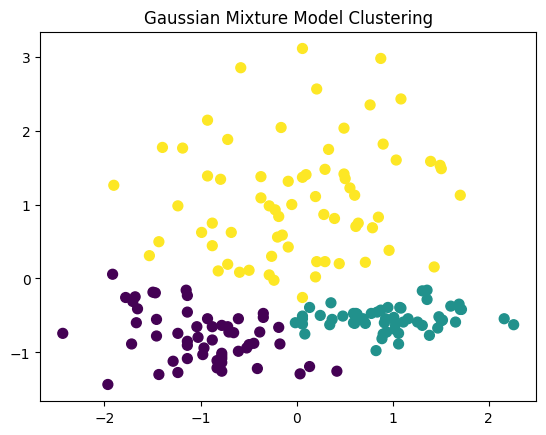

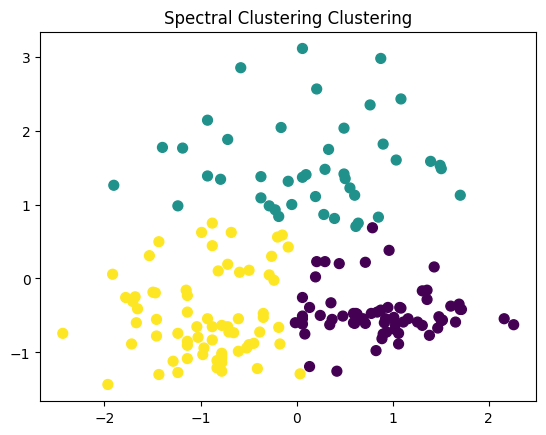

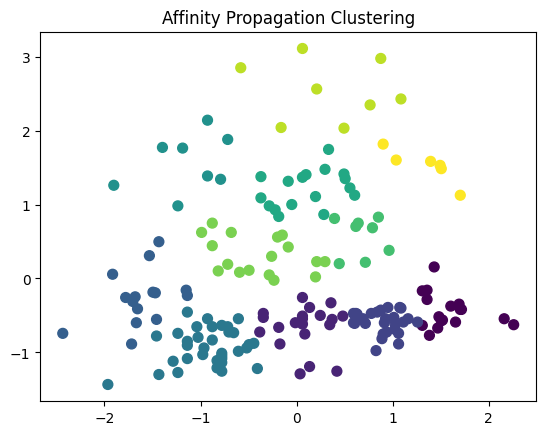

In [ ]:
# List of clustering algorithms
clustering_algorithms = {
    'K-Means': KMeans(n_clusters=3, random_state=42, n_init='auto'),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Gaussian Mixture Model': GaussianMixture(n_components=3, random_state=42),
    'Spectral Clustering': SpectralClustering(n_clusters=3, random_state=42),
    'Affinity Propagation': AffinityPropagation()
}

# Apply and visualize each clustering algorithm
for name, model in clustering_algorithms.items():
    labels = model.fit_predict(wine_data_scaled[:, :2])

    # Visualize the clusters (for 2D data)
    plt.scatter(wine_data_scaled[:, 0], wine_data_scaled[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(f"{name} Clustering")
    plt.show()

This code section evaluates the performance of various clustering algorithms, including K-Means, Agglomerative Clustering, DBSCAN, Gaussian Mixture Model, Spectral Clustering, and Affinity Propagation, on the wine dataset. Each algorithm is applied to the standardized data, and the resulting clusters are visualized in a 2D space. This visual inspection provides an initial understanding of each algorithm's ability to uncover patterns within the dataset.

## Calinski-Harabasz Index

In [ ]:
print("Calinski-Harabasz Index:")

for name, model in clustering_algorithms.items():
    # Fit the model and obtain predicted labels
    labels = model.fit_predict(wine_data_scaled[:, :2])

    # Calculate and display Calinski-Harabasz Index
    ch_index = calinski_harabasz_score(wine_data_scaled[:, :2], labels)
    print(f"{name} - {ch_index:.2f}")

Calinski-Harabasz Index:
K-Means - 199.27
Agglomerative Clustering - 172.60
DBSCAN - 16.71
Gaussian Mixture Model - 161.96
Spectral Clustering - 191.51
Affinity Propagation - 191.56


This code segment computes the Calinski-Harabasz Index for various clustering algorithms, including K-Means, Agglomerative Clustering, DBSCAN, Gaussian Mixture Model, Spectral Clustering, and Affinity Propagation. The index reflects the quality of clustering by considering the ratio of between-cluster to within-cluster variance. The results help in comparing the effectiveness of each algorithm in producing well-defined and separated clusters within the wine dataset.

---
## Summary and Conclusion

**Summary based on Calinski-Harabasz Index:**
- K-Means (199.27): High Calinski-Harabasz Index indicates well-separated, compact clusters.
- Agglomerative Clustering (172.60): Competitive alternative with good cluster quality.
- DBSCAN (16.71): Lower index suggests challenges in defining well-separated clusters.
- Gaussian Mixture Model (161.96): Respectable index, leveraging probabilistic models.
- Spectral Clustering (191.51): Effective in identifying distinct, well-defined clusters.
- Affinity Propagation (191.56): Competitive performance using message passing.

**Conclusion:**
- K-Means and Spectral Clustering excel in identifying distinct clusters.
- Agglomerative Clustering and Affinity Propagation provide viable alternatives.
- DBSCAN may not be well-suited for the dataset's inherent structure.



---



#3. Dataset - Mall Customer

In [ ]:
# Load the dataset
customer_data = pd.read_csv("/content/shopping_customer_data.csv")

# Display the first few rows of the dataset
customer_data.columns = customer_data.columns.str.strip()
print(customer_data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


This code loads a dataset named "shopping_customer_data.csv" into a Pandas DataFrame (customer_data). The column names are stripped of leading and trailing whitespaces for consistency. The first few rows of the dataset are then displayed to provide an initial overview of the data.

In [ ]:
selected_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
# Drop rows with missing values
customer_data = customer_data[selected_features].dropna()

# Standardize the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data)

This code selects relevant features, including 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)', from the customer dataset. Rows with missing values in these selected features are dropped to ensure data integrity. The remaining data is then standardized using the StandardScaler from scikit-learn, resulting in the customer_data_scaled variable. Standardization is essential for preparing the data for clustering algorithms by ensuring that all features contribute equally to the analysis.

## Applying Clustering Algorithms

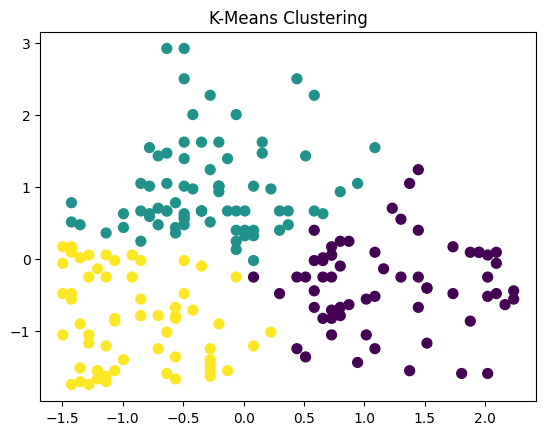

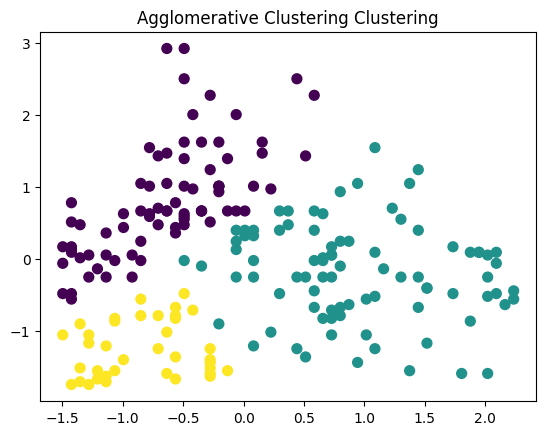

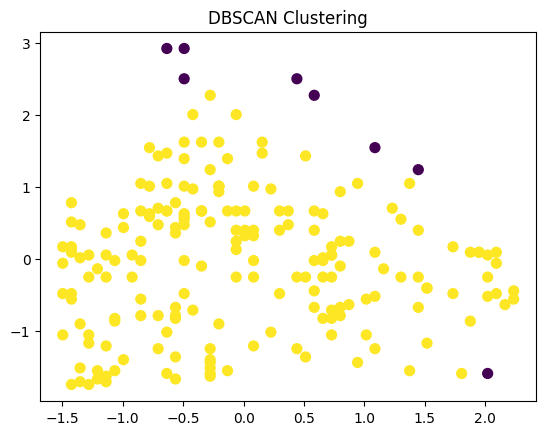

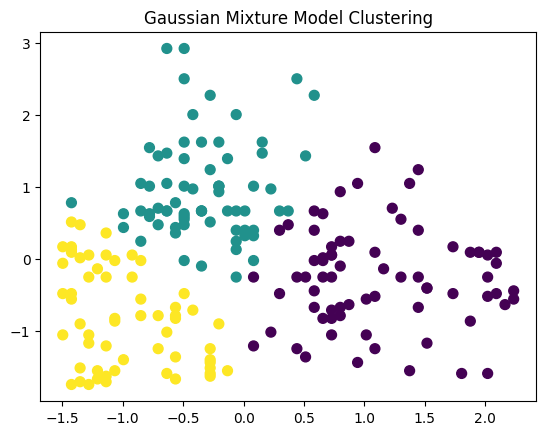

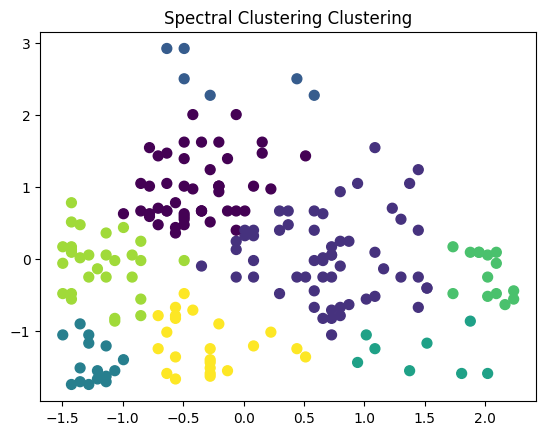

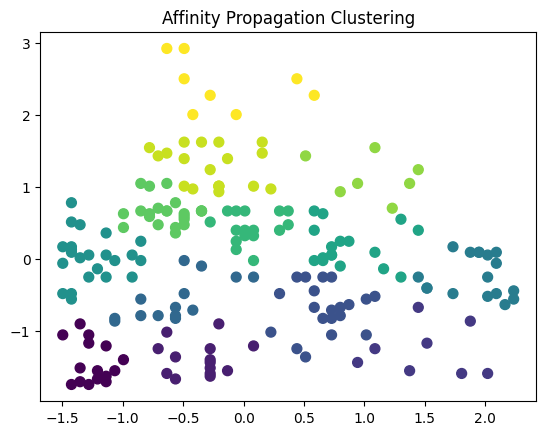

In [ ]:
# List of clustering algorithms
clustering_algorithms2 = {
    'K-Means': KMeans(n_clusters=3, random_state=42, n_init='auto'),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Gaussian Mixture Model': GaussianMixture(n_components=3, random_state=42),
    'Spectral Clustering': SpectralClustering(),
    'Affinity Propagation': AffinityPropagation()
}

# Apply and visualize each clustering algorithm
for name, model in clustering_algorithms2.items():
    labels = model.fit_predict(customer_data_scaled[:, :2])

    # Visualize the clusters (for 2D data)
    plt.scatter(customer_data_scaled[:, 0], customer_data_scaled[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(f"{name} Clustering")
    plt.show()

This code section explores the performance of diverse clustering algorithms on the standardized customer dataset, including K-Means, Agglomerative Clustering, DBSCAN, Gaussian Mixture Model, Spectral Clustering, and Affinity Propagation. Each algorithm is applied, and resulting clusters are visualized in a 2D space using a scatter plot. This visual inspection aids in assessing the clustering performance of each algorithm, providing insights into potential patterns within the customer data.

## Calinski-Harabasz Index

In [ ]:
print("Calinski-Harabasz Index:")

for name, model in clustering_algorithms.items():
    # Fit the model and obtain predicted labels
    labels = model.fit_predict(customer_data_scaled[:, :2])

    # Calculate and display Calinski-Harabasz Index
    ch_index = calinski_harabasz_score(customer_data_scaled[:, :2], labels)
    print(f"{name} - {ch_index:.2f}")

Calinski-Harabasz Index:
K-Means - 198.06
Agglomerative Clustering - 153.40
DBSCAN - 15.28
Gaussian Mixture Model - 184.03
Spectral Clustering - 187.08
Affinity Propagation - 211.68


This code calculates and prints the Calinski-Harabasz Index for various clustering algorithms applied to the standardized customer dataset. The index provides insights into the clustering quality, considering the ratio of between-cluster to within-cluster variance. The results assist in comparing the effectiveness of each algorithm in forming well-defined and separated clusters within the customer data.

---
## Summary and Conclusion

**Summary based on Calinski-Harabasz Index:**
- K-Means (198.06): High index, indicating well-separated and compact clusters.
- Agglomerative Clustering (153.40): Lower but good cluster separation and compactness.
- DBSCAN (15.28): Significantly lower index, suggesting challenges in defining well-separated clusters.
- Gaussian Mixture Model (184.03): Respectable performance using probabilistic models.
- Spectral Clustering (187.08): Effective in identifying distinct, well-defined clusters.
- Affinity Propagation (211.68): Highest index, indicating superior clustering performance.

**Conclusion:**
- K-Means, Spectral Clustering, and Affinity Propagation excel in identifying distinct clusters.
- Agglomerative Clustering and Gaussian Mixture Model provide viable alternatives.
- DBSCAN may not be well-suited for the dataset's inherent structure.

---